In [1]:
#Customer Segmentation using Clustering Techniques: A Data-Driven Approach to Enhance Marketing Strategy.
# Step 1: Import pandas, load the dataset from CSV, and display the first 5 rows.
import pandas as pd
data = pd.read_csv("Mall_Customers.csv") 
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Step 2: Get an overview of the dataset, including structure, summary statistics, and dimensions.
data_info = data.info()
data_description = data.describe(include='all')
num_instances = data.shape[0]
num_attributes = data.shape[1]
print("Dataset Info:")
print(data_info)
print("\nDataset Description:")
print(data_description)
print(f"\nNumber of instances (customers): {num_instances}")
print(f"Number of attributes (features): {num_attributes}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Dataset Info:
None

Dataset Description:
        CustomerID  Gender         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min    

In [3]:
# Step 3: Data Preprocessing
# 3a. Check for missing values in the dataset and handle them if necessary.
missing_values = data.isnull().sum()
print(missing_values)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [49]:
# Step 3: Data Preprocessing
# 3b. Encode categorical variables (e.g., 'Gender') using one-hot encoding.
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)
data_encoded['Gender_Male'] = data_encoded['Gender_Male'].astype(int)
print(data_encoded.head())


   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1 -1.424569           -1.738999               -0.434801   
1           2 -1.281035           -1.738999                1.195704   
2           3 -1.352802           -1.700830               -1.715913   
3           4 -1.137502           -1.700830                1.040418   
4           5 -0.563369           -1.662660               -0.395980   

   Gender_Male  
0            1  
1            1  
2            0  
3            0  
4            0  


In [5]:
# Step 3: Data Preprocessing
# 3c. Select numerical features and scale them using StandardScaler.
from sklearn.preprocessing import StandardScaler
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])
print(data_encoded.head())

   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1 -1.424569           -1.738999               -0.434801   
1           2 -1.281035           -1.738999                1.195704   
2           3 -1.352802           -1.700830               -1.715913   
3           4 -1.137502           -1.700830                1.040418   
4           5 -0.563369           -1.662660               -0.395980   

   Gender_Male  
0            1  
1            1  
2            0  
3            0  
4            0  


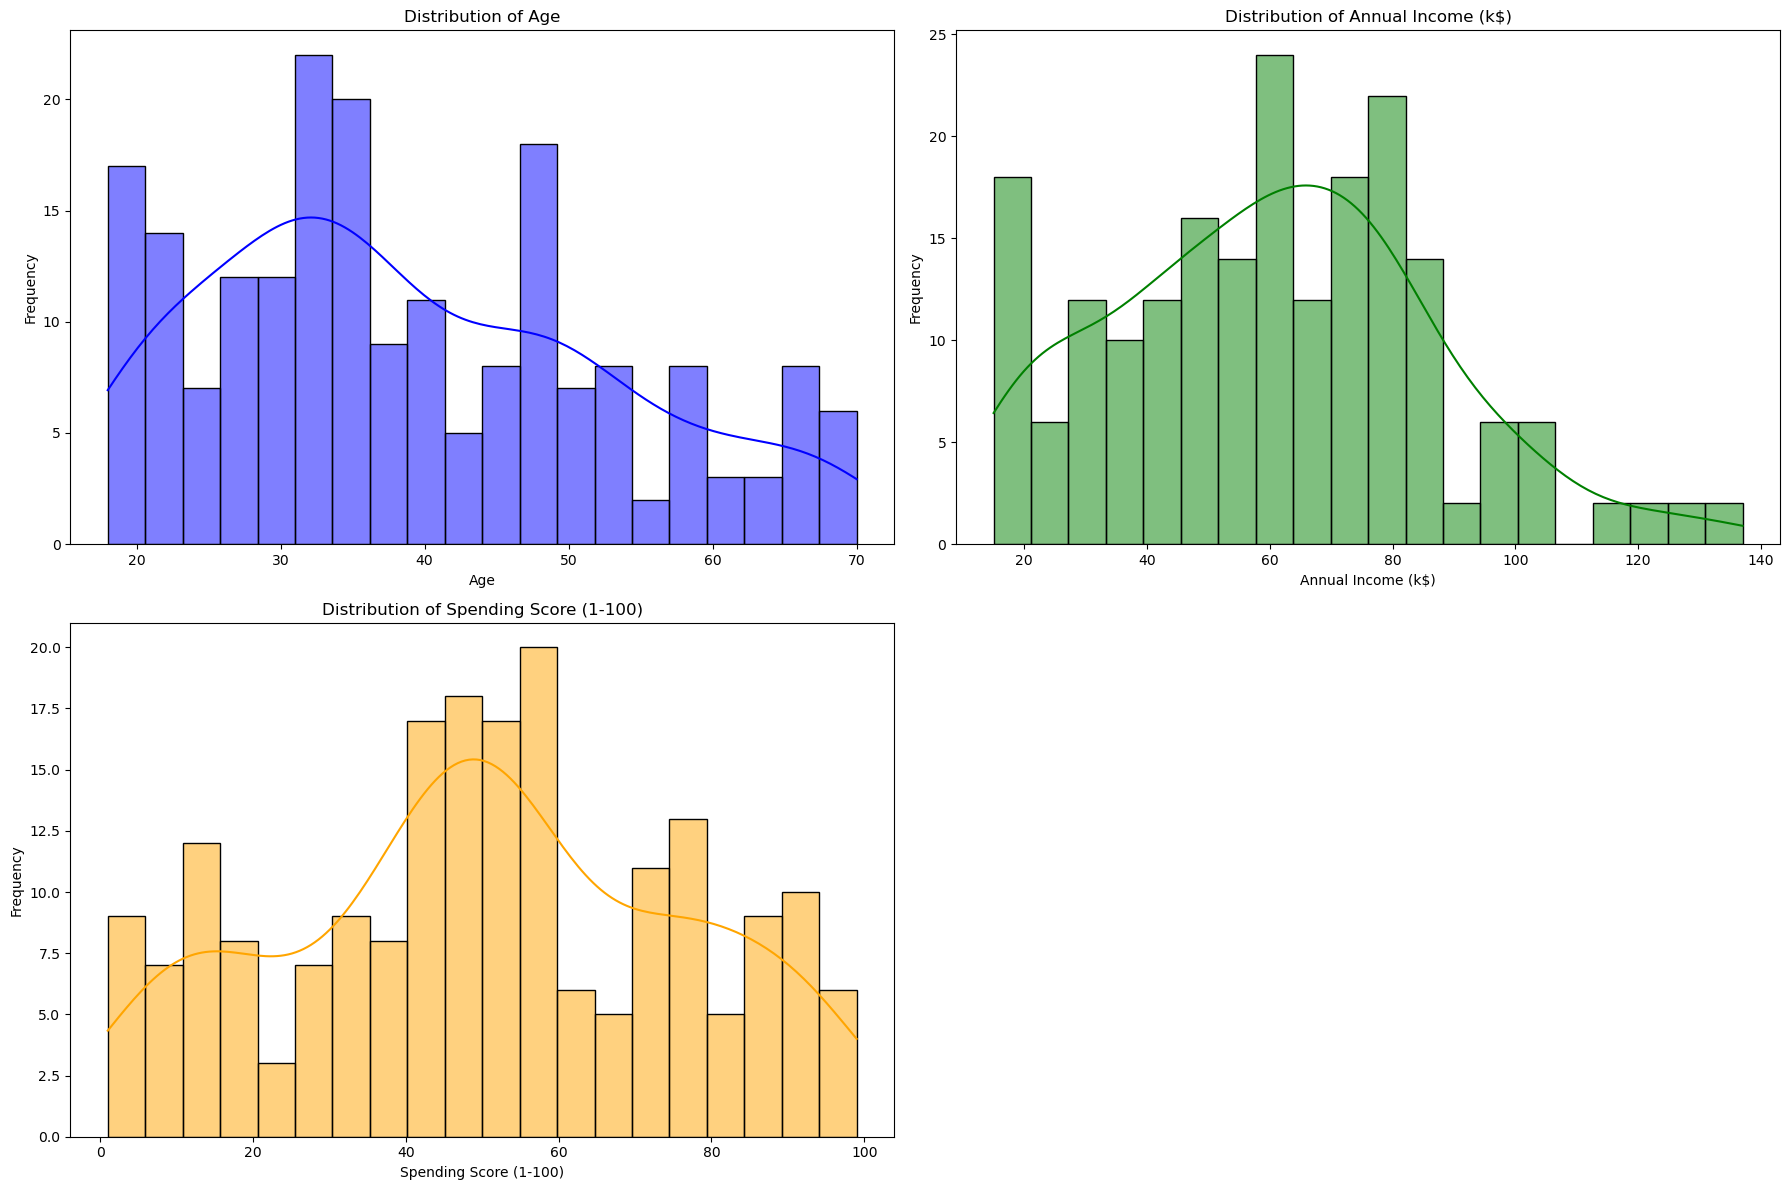

In [50]:
# Step 4: Exploratory Data Analysis (EDA)
# 4a. Visualize the distribution of numerical features: Age, Annual Income, and Spending Score using histograms.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
os.environ["OMP_NUM_THREADS"] = "1"
dataset = pd.read_csv('Mall_Customers.csv')
dataset['Gender'] = dataset['Gender'].astype('category')
plt.figure(figsize=(18, 12))
# Histogram for Age
plt.subplot(2, 2, 1)
sns.histplot(dataset['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Histogram for Annual Income (k$)
plt.subplot(2, 2, 2)
sns.histplot(dataset['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
# Histogram for Spending Score (1-100)
plt.subplot(2, 2, 3)
sns.histplot(dataset['Spending Score (1-100)'], bins=20, kde=True, color='orange')
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
# Adjust layout
plt.tight_layout()
plt.show()


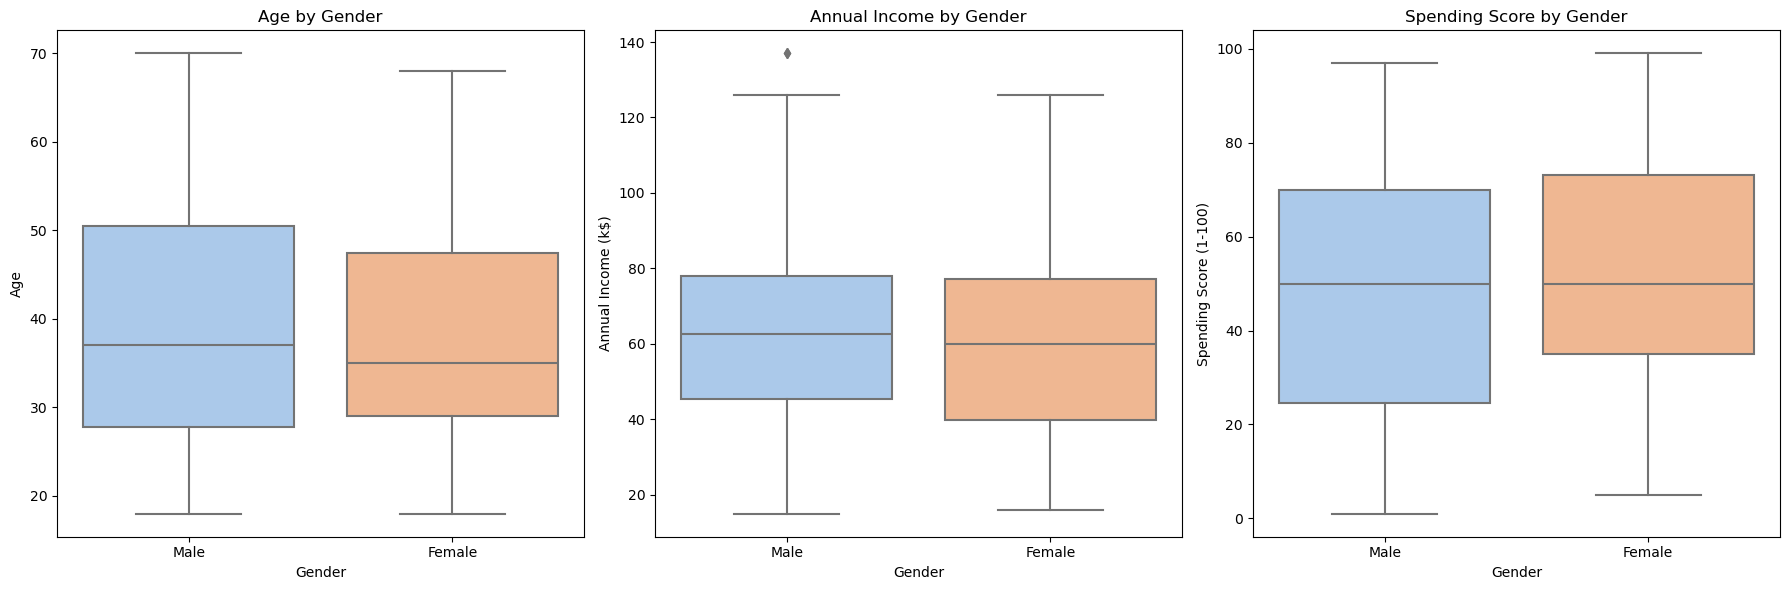

In [7]:
# Step 4: Exploratory Data Analysis (EDA)
# 4b. Visualize the distribution of numerical features by Gender using box plots.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv('Mall_Customers.csv')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Gender', y='Age', data=dataset, palette='pastel', ax=axes[0])
axes[0].set_title('Age by Gender')
# Annual Income by Gender
sns.boxplot(x='Gender', y='Annual Income (k$)', data=dataset, palette='pastel', ax=axes[1])
axes[1].set_title('Annual Income by Gender')
# Spending Score by Gender
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=dataset, palette='pastel', ax=axes[2])
axes[2].set_title('Spending Score by Gender')
plt.tight_layout()
plt.show()


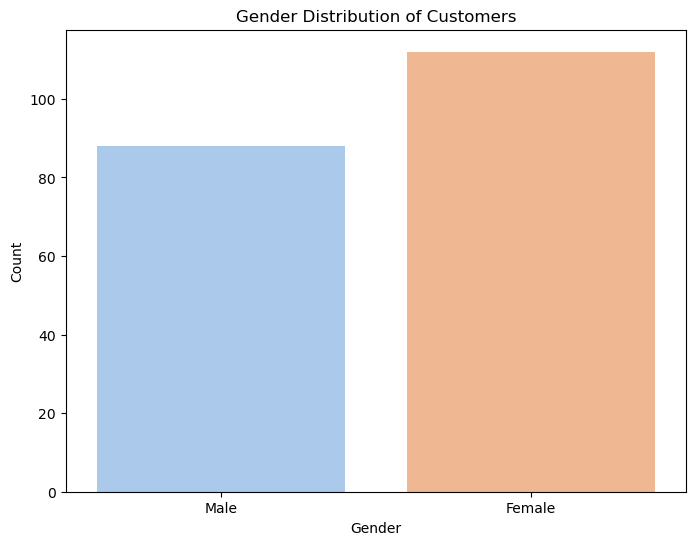

In [9]:
# Step 4: Exploratory Data Analysis (EDA)
# 4c. Visualize the distribution of Gender in the dataset using a count plot.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('Mall_Customers.csv')
# Plot Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=dataset, palette='pastel')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


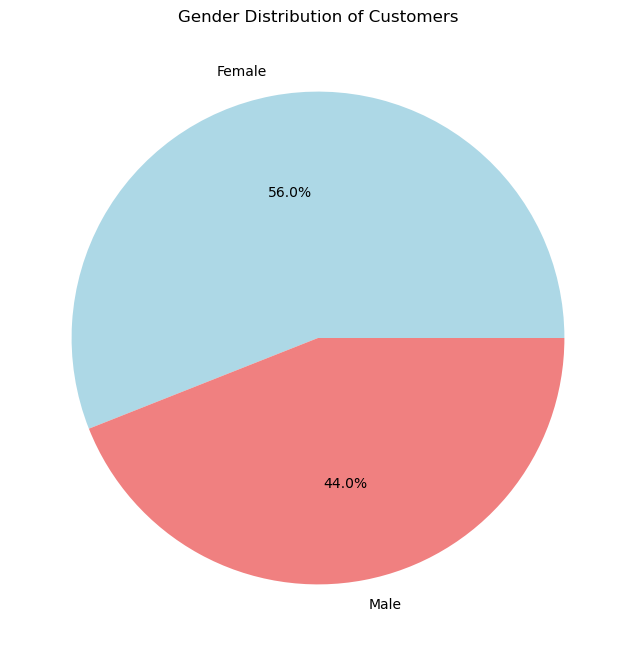

In [58]:
# Step 4: Exploratory Data Analysis (EDA)
# 4d. Visualize the gender distribution of customers using a pie chart.
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('Mall_Customers.csv')
gender_counts = dataset['Gender'].value_counts()
gender_percentage = gender_counts / gender_counts.sum() * 100
# Plot the pie chart for gender distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution of Customers')
plt.show()

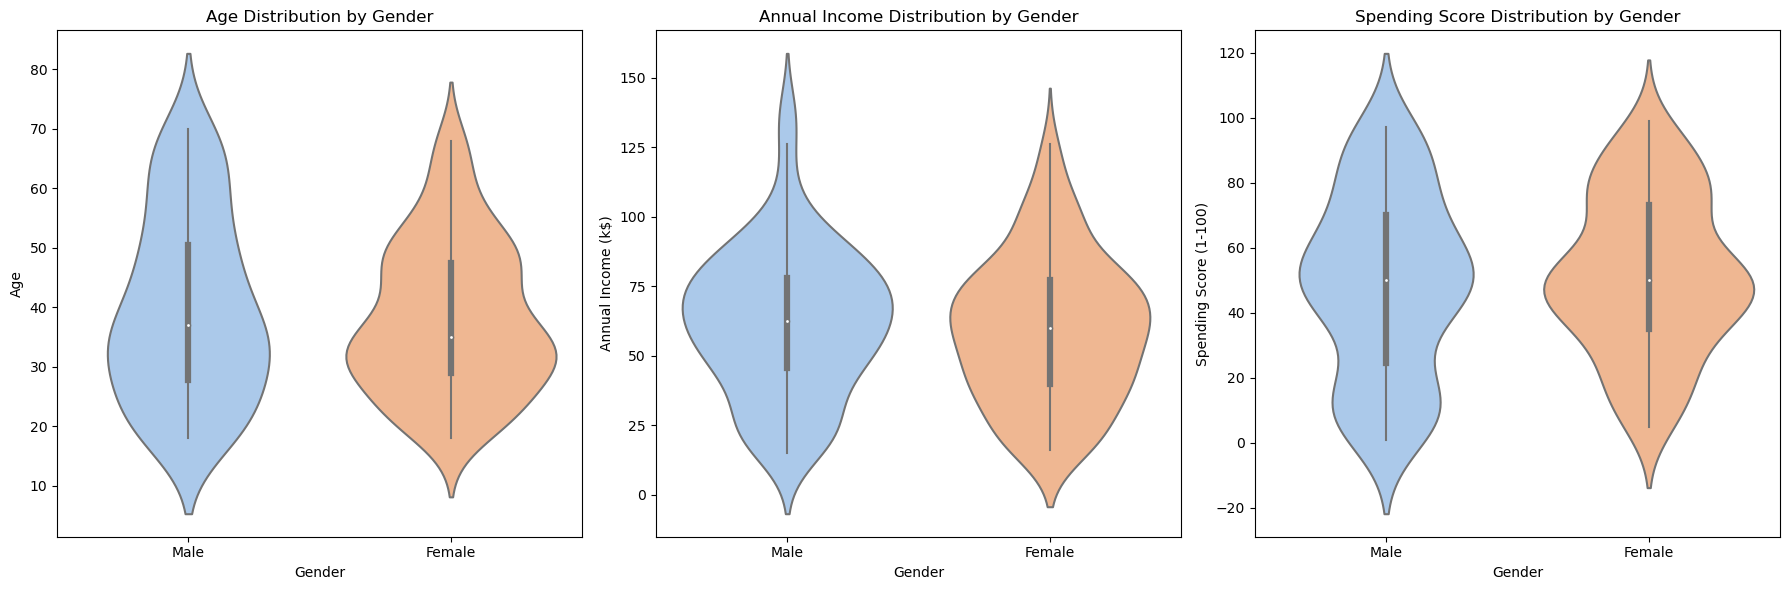

In [11]:
# Step 4: Exploratory Data Analysis (EDA)
#4e.  Visualize the distribution of Age, Annual Income, and Spending Score by Gender using violin plots.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv('Mall_Customers.csv')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.violinplot(x='Gender', y='Age', data=dataset, palette='pastel', ax=axes[0])
axes[0].set_title('Age Distribution by Gender')
# Annual Income by Gender
sns.violinplot(x='Gender', y='Annual Income (k$)', data=dataset, palette='pastel', ax=axes[1])
axes[1].set_title('Annual Income Distribution by Gender')
# Spending Score by Gender
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=dataset, palette='pastel', ax=axes[2])
axes[2].set_title('Spending Score Distribution by Gender')
plt.tight_layout()
plt.show()


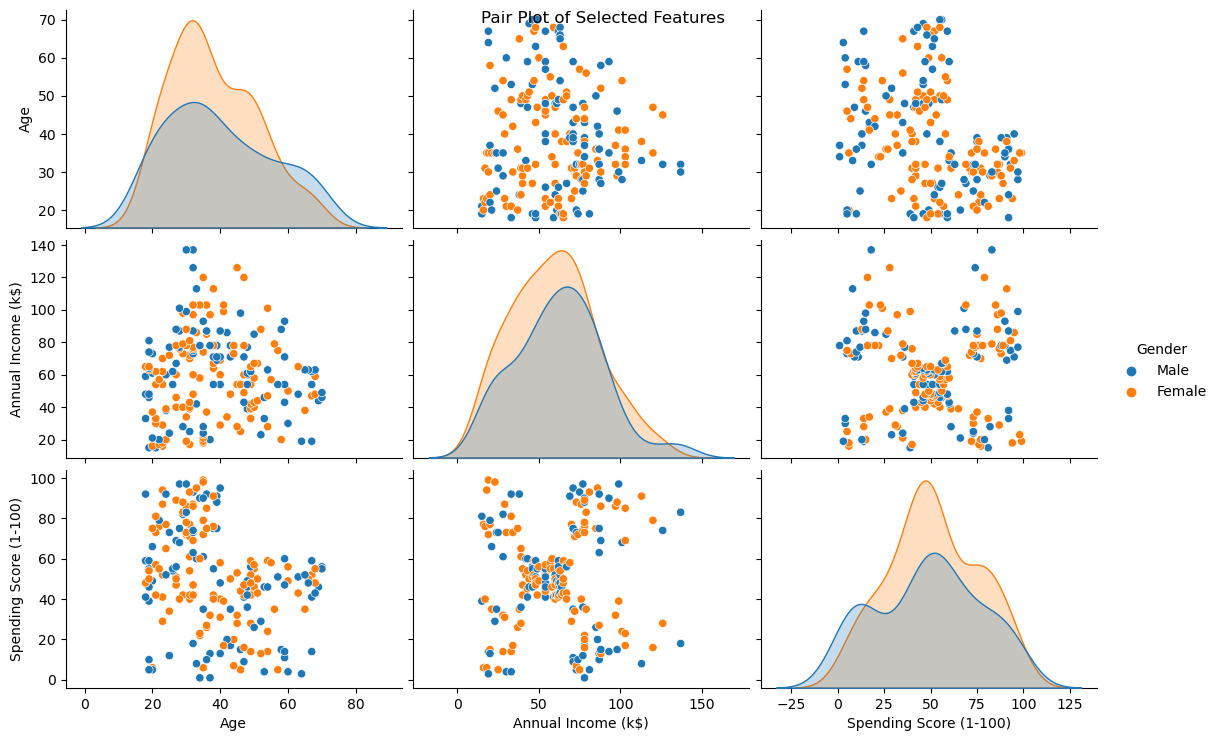

In [12]:
# Step 4: Exploratory Data Analysis (EDA)
#4f. Visualize the relationships between selected features using a pair plot, with Gender as the hue.
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.cluster._kmeans')
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn._oldcore')
import matplotlib.pyplot as plt
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.suptitle('Pair Plot of Selected Features')
plt.show()

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


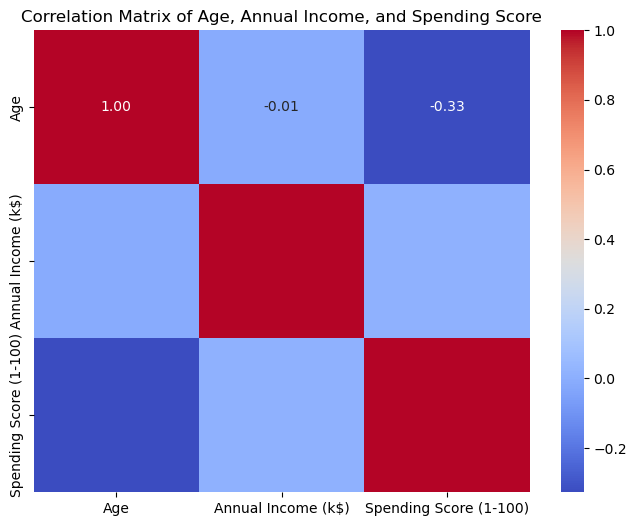

In [32]:
# Step 4: Exploratory Data Analysis (EDA)
#4e. Visualize the correlation between Age, Annual Income, and Spending Score using a heatmap.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv('Mall_Customers.csv')
selected_features = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Added Spending Score
correlation_matrix = selected_features.corr()
print(correlation_matrix)
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Age, Annual Income, and Spending Score')
plt.show()

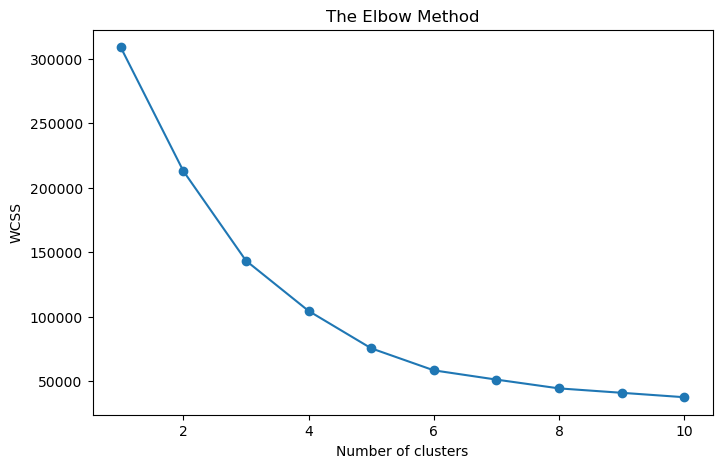

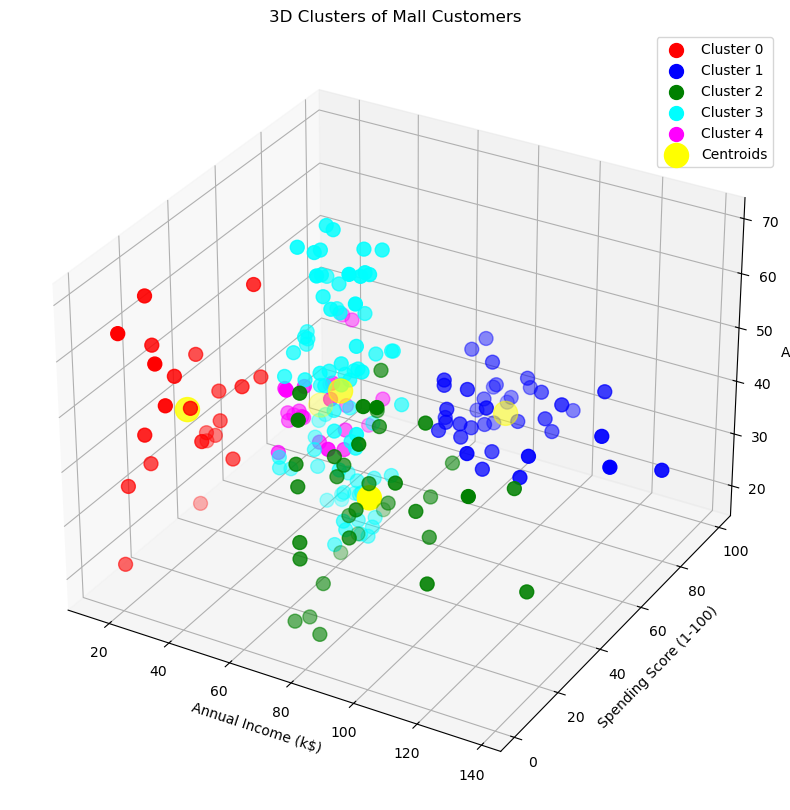

Silhouette Score: 0.44


In [33]:
# Step 5: KMeans Clustering of Age, Annual Income, and Spending Score
# 5a(i). Perform KMeans clustering to segment customers into different groups and visualize the results.
import os
os.environ["OMP_NUM_THREADS"] = "1"  
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
# Find the optimal number of clusters using the Elbow Method
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)  # Explicitly set n_init
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Plot the Elbow Method to determine the best number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)  # Explicitly set n_init
y_kmeans = kmeans.fit_predict(X)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    ax.scatter(X[y_kmeans == i, 1], X[y_kmeans == i, 2], X[y_kmeans == i, 0],
               s=100, c=colors[i], label=f'Cluster {i}')
# Cluster centers
ax.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 0],
           s=300, c='yellow', marker='o', label='Centroids')
ax.set_title('3D Clusters of Mall Customers')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.legend()
plt.show()
#Silhouette Score
silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
print(f'Silhouette Score: {silhouette_score_kmeans}')


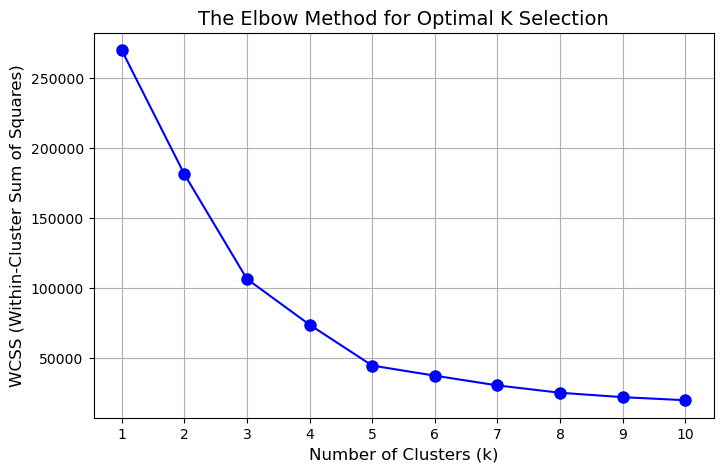

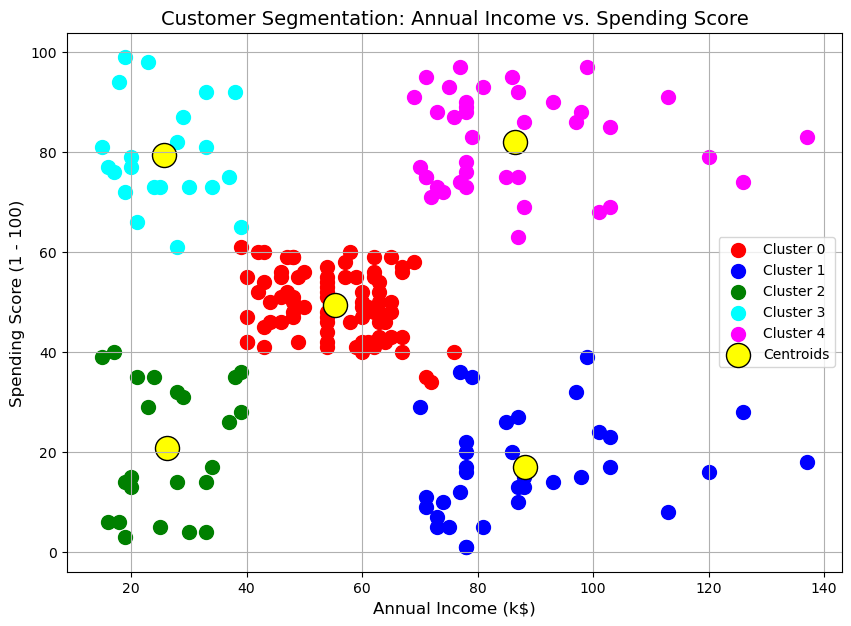

Silhouette Score: 0.55


In [34]:
# Step 5a(ii): KMeans Clustering of Annual Income and Spending Score
import os
os.environ["OMP_NUM_THREADS"] = "1" 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
dataset = pd.read_csv('Mall_Customers.csv')
# Extract relevant features (Annual Income and Spending Score)
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
## Plot the Elbow Method to determine the best number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', markersize=8)
plt.title('The Elbow Method for Optimal K Selection', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(optimal_k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i}')
# Plot Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', marker='o', edgecolors='black', label='Centroids')
plt.title('Customer Segmentation: Annual Income vs. Spending Score', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1 - 100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
silhouette_avg = round(silhouette_score(X, y_kmeans), 2)
print(f'Silhouette Score: {silhouette_avg}')


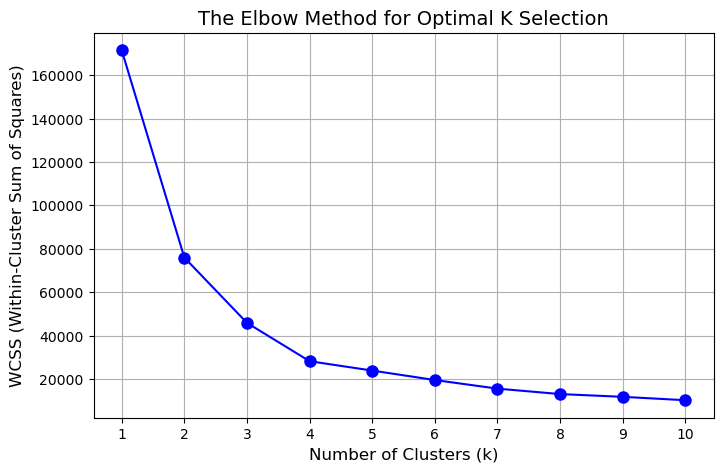

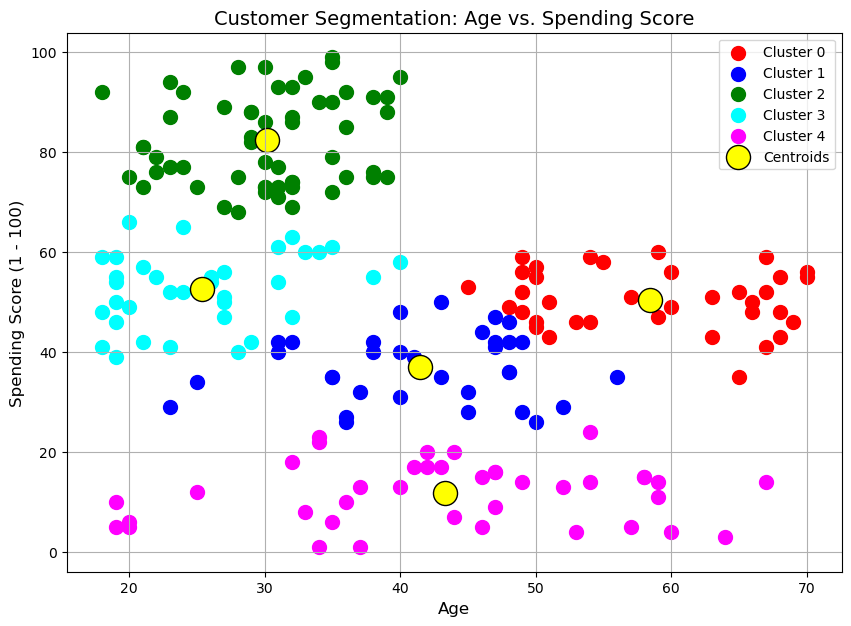

Silhouette Score: 0.43


In [19]:
# Step 5a(iii): KMeans Clustering of Age and Spending Score
import os
os.environ["OMP_NUM_THREADS"] = "1"  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset[['Age', 'Spending Score (1-100)']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', markersize=8)
plt.title('The Elbow Method for Optimal K Selection', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(optimal_k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i}')
# Plot Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', marker='o', edgecolors='black', label='Centroids')
plt.title('Customer Segmentation: Age vs. Spending Score', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score (1 - 100)', fontsize=12)
plt.legend()
plt.show()
silhouette_avg = round(silhouette_score(X, y_kmeans), 2)
print(f'Silhouette Score: {silhouette_avg}')


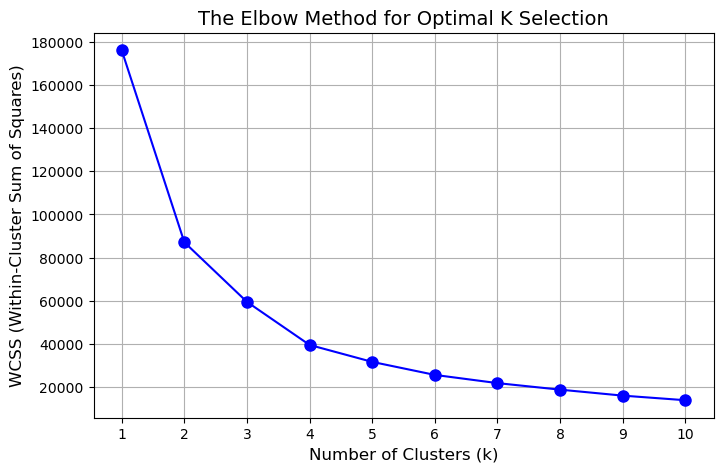

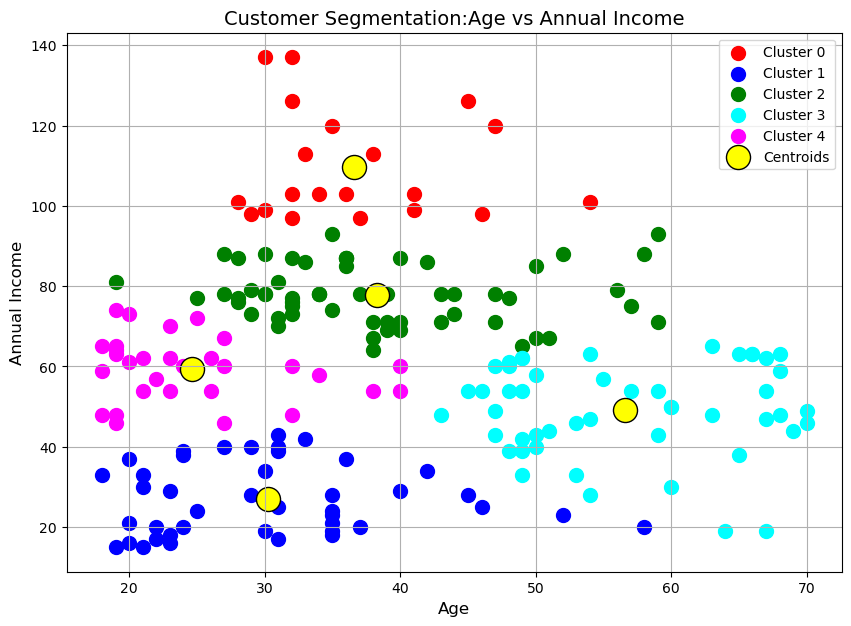

Silhouette Score: 0.4


In [22]:
# Step 5a(iv): KMeans Clustering of Age and annual income
import os
os.environ["OMP_NUM_THREADS"] = "1" 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset[['Age','Annual Income (k$)']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', markersize=8)
plt.title('The Elbow Method for Optimal K Selection', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(optimal_k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i}')
# Plot Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', marker='o', edgecolors='black', label='Centroids')
plt.title('Customer Segmentation:Age vs Annual Income', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)
plt.legend()
plt.show()
#Silhouette Score Calculation
silhouette_avg = round(silhouette_score(X, y_kmeans), 2)
print(f'Silhouette Score: {silhouette_avg}')


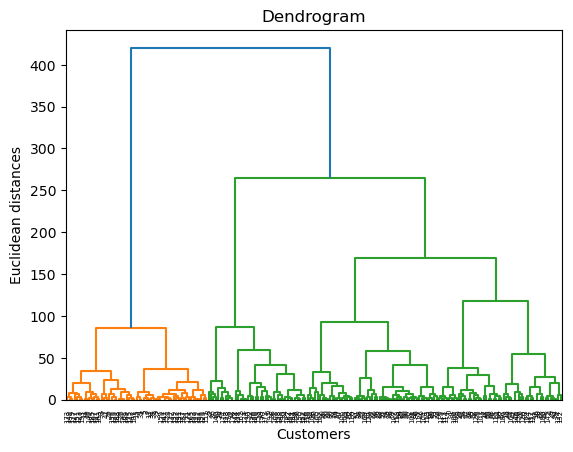

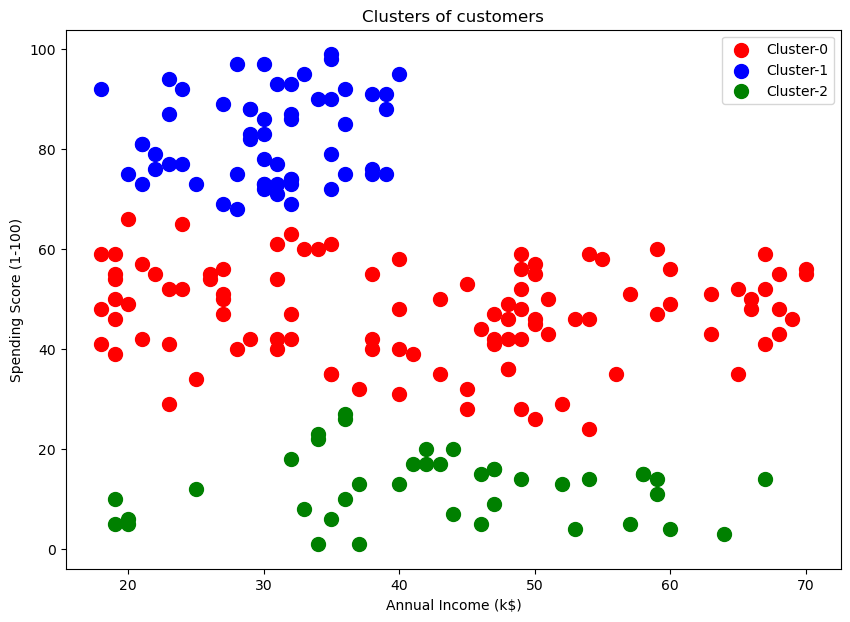

Silhouette Score : 0.44
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        0
1    Male   21                  15                      81        1
2  Female   20                  16                       6        2
3  Female   23                  16                      77        1
4  Female   31                  17                      40        0
5  Female   22                  17                      76        1
6  Female   35                  18                       6        2
7  Female   23                  18                      94        1
8    Male   64                  19                       3        2
9  Female   30                  19                      72        1
     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
190  Female   34                 103                      23        2
191  Female   32                 103                      69        1
192    Male   33  

In [35]:
# Step 5b(i)Hierarchical Clustering for Age and Spending Score
import os
os.environ["OMP_NUM_THREADS"] = "1" 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values
dataset.shape
dataset.isnull().sum()
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc
plt.figure(figsize = (10, 7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster-0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster-1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster-2')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
print('Silhouette Score : {}'.format(silhouette_score_hc))
dataset['Cluster'] =y_hc
# Display the first few rows of the Dataset
df_display = dataset[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]
print(df_display.head(10))
print(df_display.tail(10))

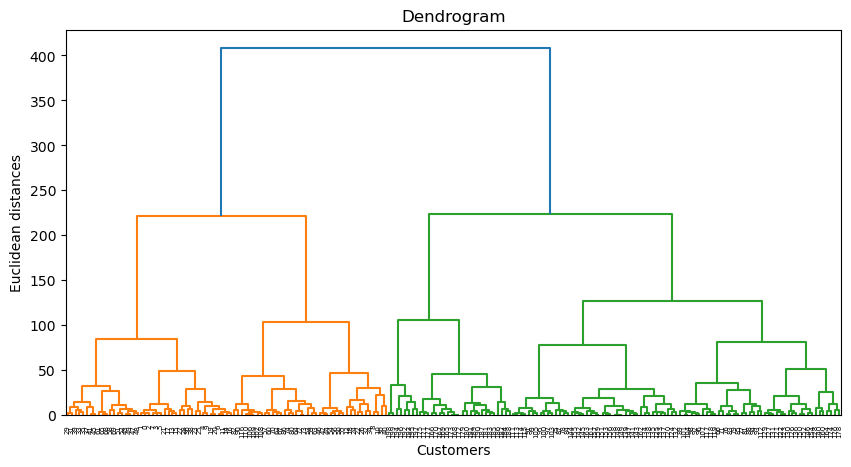

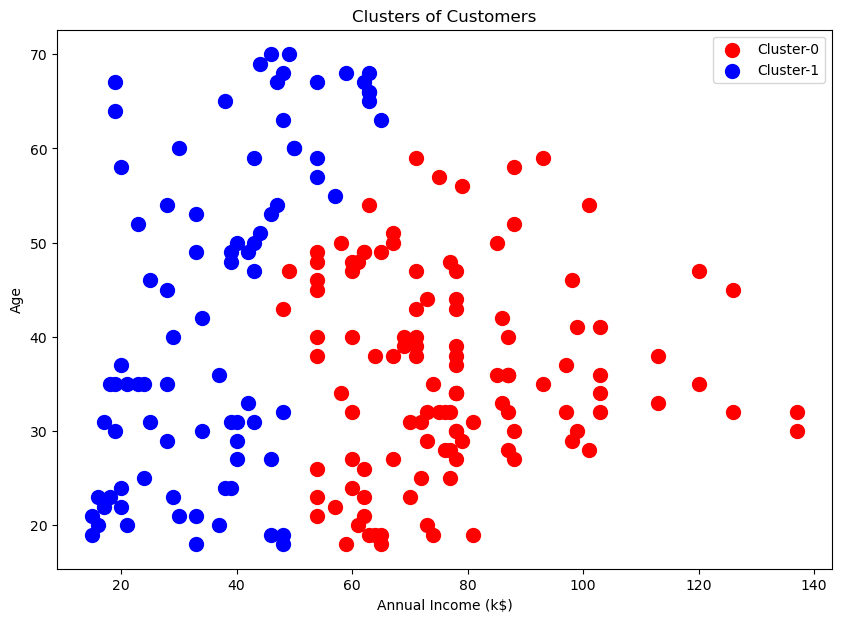

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        1
1    Male   21                  15                      81        1
2  Female   20                  16                       6        1
3  Female   23                  16                      77        1
4  Female   31                  17                      40        1
5  Female   22                  17                      76        1
6  Female   35                  18                       6        1
7  Female   23                  18                      94        1
8    Male   64                  19                       3        1
9  Female   30                  19                      72        1
     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
190  Female   34                 103                      23        0
191  Female   32                 103                      69        0
192    Male   33                 113      

In [48]:
# Step 5b(ii)Hierarchical Clustering for Annual income and age
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset[['Annual Income (k$)', 'Age']].values 
# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
# Scatter Plot of Clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster-0', marker='o')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster-1', marker='o')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age') 
plt.legend()
plt.show()
# Assign Cluster Labels to Dataset
dataset['Cluster'] = y_hc
# Display first and last 10 rows of the updated dataset
df_display = dataset[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]
print(df_display.head(10))
print(df_display.tail(10))
# Calculate Silhouette Score
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
print('Silhouette Score:', silhouette_score_hc)


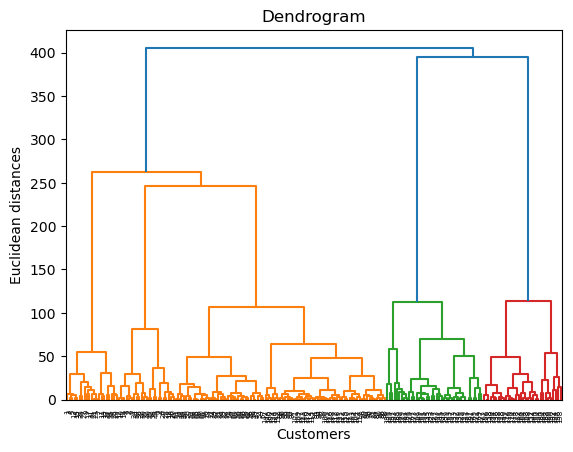

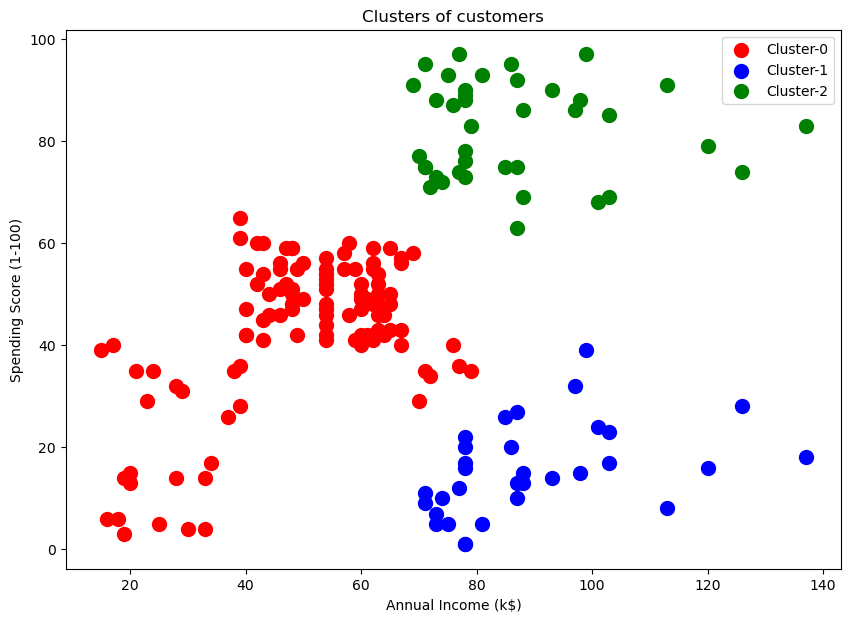

Silhouette Score : 0.49
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        0
1    Male   21                  15                      81        3
2  Female   20                  16                       6        0
3  Female   23                  16                      77        3
4  Female   31                  17                      40        0
5  Female   22                  17                      76        3
6  Female   35                  18                       6        0
7  Female   23                  18                      94        3
8    Male   64                  19                       3        0
9  Female   30                  19                      72        3
     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
190  Female   34                 103                      23        1
191  Female   32                 103                      69        2
192    Male   33  

In [37]:
# Step 5b(iii)Hierarchical Clustering for Annual income and spending score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
dataset.shape
dataset.isnull().sum()
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc
plt.figure(figsize = (10, 7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster-0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster-1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster-2')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
from sklearn.metrics import silhouette_score
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
print('Silhouette Score : {}'.format(silhouette_score_hc))
dataset['Cluster'] =y_hc
# Display the first few rows of the DataFrame
df_display = dataset[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]
print(df_display.head(10))
print(df_display.tail(10))

Cluster Labels: [ 0  0  1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]
DBSCAN Silhouette Score:  0.09


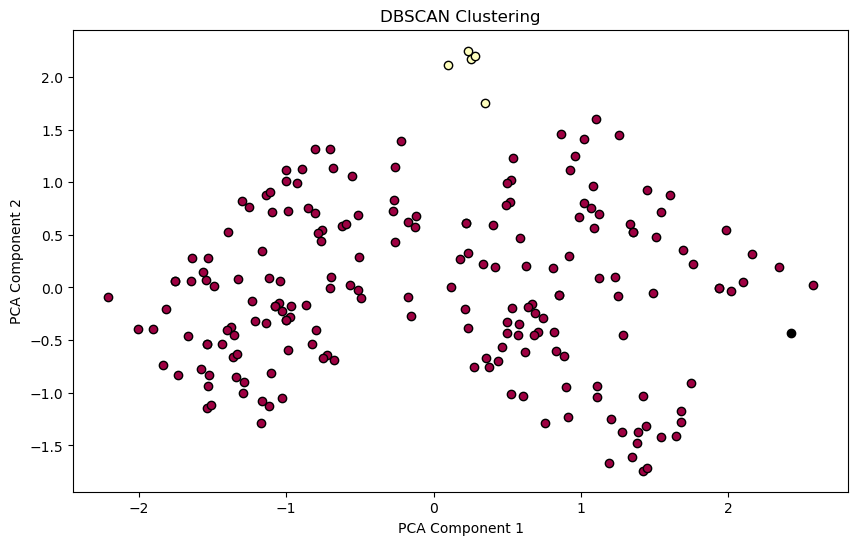

In [53]:
# Step 5c(i)DBSCAN Clustering for Age and spending score
from sklearn.decomposition import PCA
dataset = pd.read_csv('Mall_Customers.csv')
data = dataset[['Age', 'Spending Score (1-100)']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data_scaled)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(pca_features)
dataset.loc[:, 'DBSCAN_Cluster'] = dbscan.labels_
dbscan.fit(pca_features)
# Print the cluster labels
print('Cluster Labels:', dbscan.labels_)
if len(set(dbscan.labels_)) > 1:
    dbscan_silhouette_score = silhouette_score(pca_features, dataset['DBSCAN_Cluster'])
    print('DBSCAN Silhouette Score: ', round(dbscan_silhouette_score, 2))
else:
    print('DBSCAN Silhouette Score: Cannot be calculated with only one cluster')
plt.figure(figsize=(10, 6))
unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise

    class_member_mask = (dbscan.labels_ == k)
    xy = pca_features[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Cluster Labels: [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0 -1  0 -1 -1 -1 -1]
DBSCAN Silhouette Score:  0.34


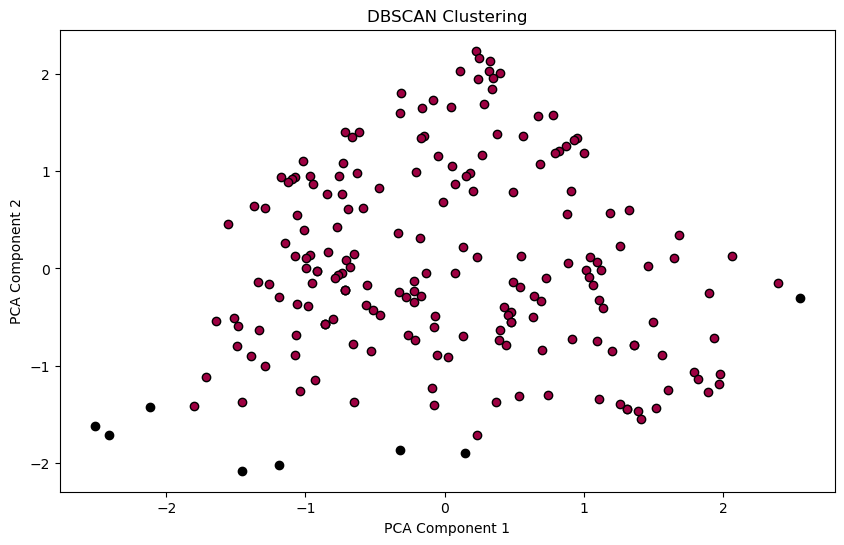

In [54]:
# Step 5c(ii)DBSCAN Clustering for Annual income and age
from sklearn.decomposition import PCA
dataset = pd.read_csv('Mall_Customers.csv')
data = dataset[['Annual Income (k$)', 'Age']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data_scaled)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(pca_features)
dataset.loc[:, 'DBSCAN_Cluster'] = dbscan.labels_
dbscan.fit(pca_features)
# Print the cluster labels
print('Cluster Labels:', dbscan.labels_)
if len(set(dbscan.labels_)) > 1:
    dbscan_silhouette_score = silhouette_score(pca_features, dataset['DBSCAN_Cluster'])
    print('DBSCAN Silhouette Score: ', round(dbscan_silhouette_score, 2))
else:
    print('DBSCAN Silhouette Score: Cannot be calculated with only one cluster')
plt.figure(figsize=(10, 6))
unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (dbscan.labels_ == k)
    xy = pca_features[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Cluster Labels: [ 0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0 -1  0 -1  0 -1  0
 -1  0 -1  0 -1 -1 -1 -1]
DBSCAN Silhouette Score:  0.32


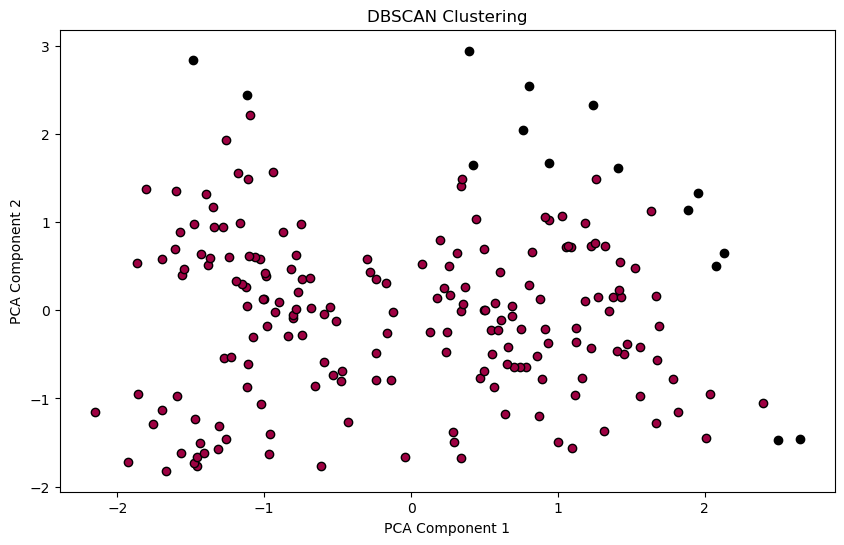

In [55]:
# Step 5c(iii)DBSCAN Clustering for Age, annual income and spending score
from sklearn.decomposition import PCA
dataset = pd.read_csv('Mall_Customers.csv')
data = dataset[['Age','Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data_scaled)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(pca_features)
dataset.loc[:, 'DBSCAN_Cluster'] = dbscan.labels_
dbscan.fit(pca_features)
# Print the cluster labels
print('Cluster Labels:', dbscan.labels_)
if len(set(dbscan.labels_)) > 1:
    dbscan_silhouette_score = silhouette_score(pca_features, dataset['DBSCAN_Cluster'])
    print('DBSCAN Silhouette Score: ', round(dbscan_silhouette_score, 2))
else:
    print('DBSCAN Silhouette Score: Cannot be calculated with only one cluster')
plt.figure(figsize=(10, 6))
unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (dbscan.labels_ == k)
    xy = pca_features[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Cluster Labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0 -1
 -1  1 -1 -1 -1 -1 -1 -1]
DBSCAN Silhouette Score:  0.35


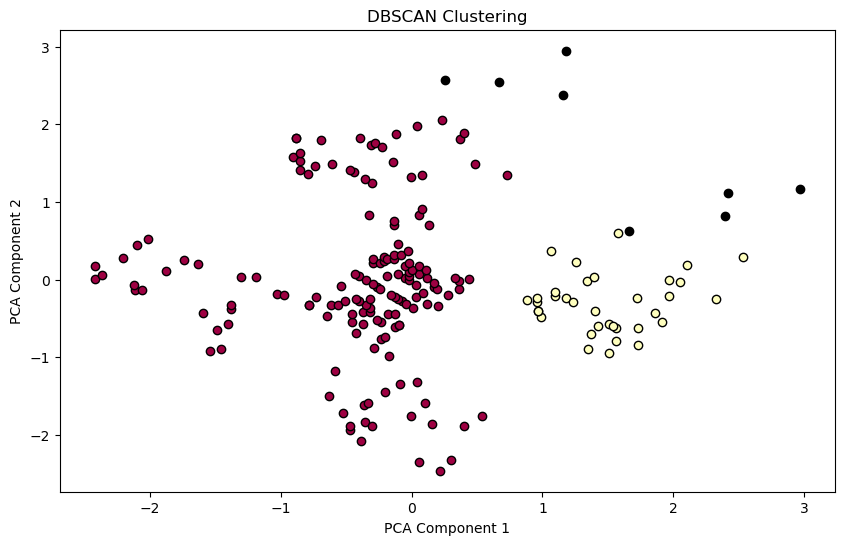

In [56]:
# Step 5c(iv)DBSCAN Clustering for Annual income and spending score
from sklearn.decomposition import PCA
dataset = pd.read_csv('Mall_Customers.csv')
data = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data_scaled)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(pca_features)
dataset.loc[:, 'DBSCAN_Cluster'] = dbscan.labels_
dbscan.fit(pca_features)
# Print the cluster labels
print('Cluster Labels:', dbscan.labels_)
if len(set(dbscan.labels_)) > 1:
    dbscan_silhouette_score = silhouette_score(pca_features, dataset['DBSCAN_Cluster'])
    print('DBSCAN Silhouette Score: ', round(dbscan_silhouette_score, 2))
else:
    print('DBSCAN Silhouette Score: Cannot be calculated with only one cluster')
plt.figure(figsize=(10, 6))
unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  
    class_member_mask = (dbscan.labels_ == k)
    xy = pca_features[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

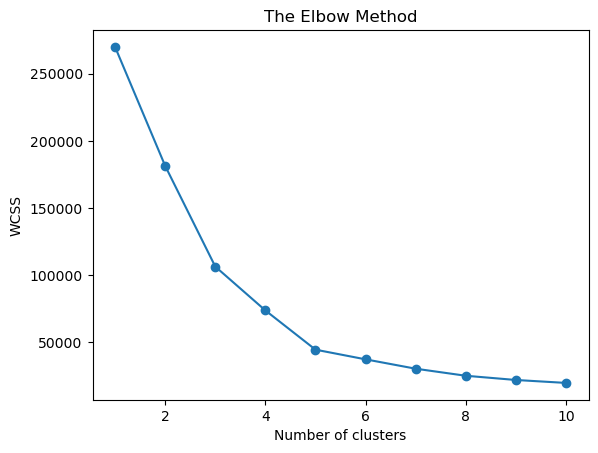

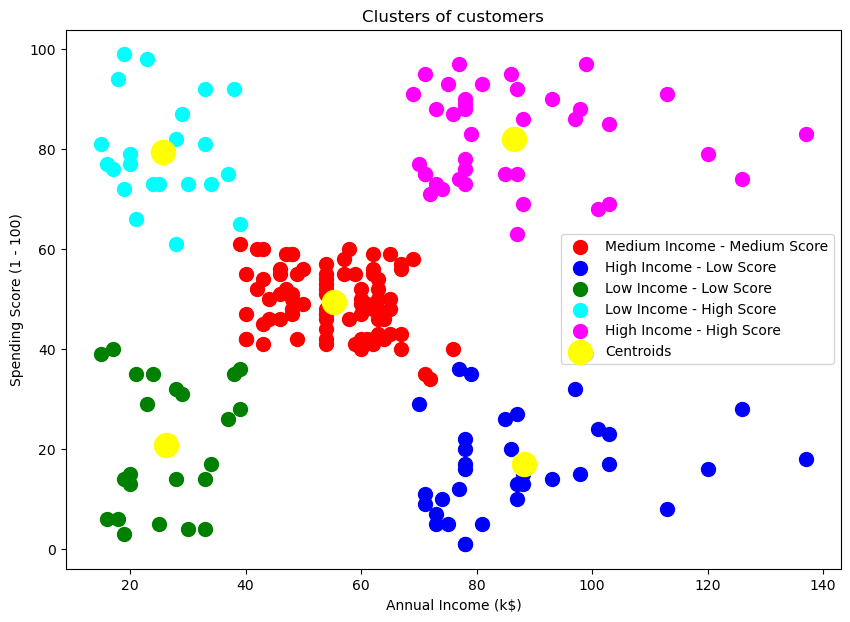

Silhouette Score : 0.55


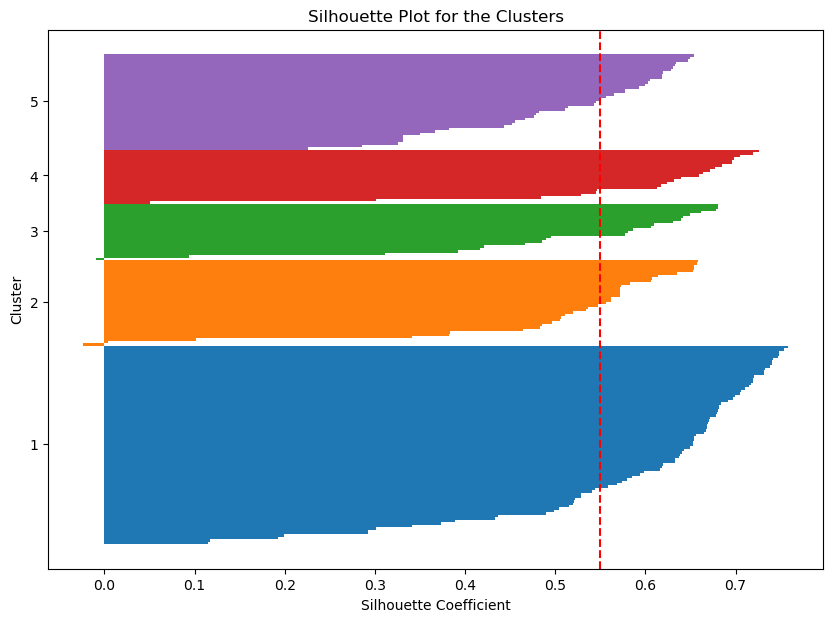

In [39]:
# When compared to other clustering methods, KMeans provides the best optimal silhouette score.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values
# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Applying KMeans to the dataset with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
# Visualizing the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Medium Income - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='High Income - Low Score')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Low Income - Low Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Low Income - High Score')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='High Income - High Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()
# Calculate and display the silhouette score
silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
print('Silhouette Score : {}'.format(silhouette_score_kmeans))
# Visualizing the silhouette score for each sample
silhouette_vals = silhouette_samples(X, y_kmeans)
plt.figure(figsize=(10, 7))
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(y_kmeans)):
    cluster_silhouette_vals = silhouette_vals[y_kmeans == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)
plt.axvline(silhouette_score_kmeans, color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(y_kmeans) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Plot for the Clusters')
plt.show()


In [57]:
#Performs clustering using K-Means, Hierarchical Clustering, and DBSCAN on selected features, then analyzes and summarizes the resulting clusters based on customer data.
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)
# Optimal number of clusters for K-Means
optimal_clusters = 5
optimal_clusters_hier = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
dataset['KMeans_Labels'] = kmeans_labels
hc = AgglomerativeClustering(n_clusters=optimal_clusters_hier, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_features)
dataset['HC_Labels'] = hc_labels
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)
unique_labels = set(dbscan_labels)
label_map = {-1: -1}  # Map noise points to -1
# Create a mapping for remaining labels
cluster_index = 0
for label in unique_labels:
    if label != -1 and cluster_index < 2:  # Map up to 2 clusters
        label_map[label] = cluster_index
        cluster_index += 1
# Exclude cluster 2 and map remaining labels
adjusted_dbscan_labels = [label_map.get(label, -1) for label in dbscan_labels]
dataset['DBSCAN_Labels'] = adjusted_dbscan_labels
# Function to analyze clusters
def analyze_clusters(dataset, label_column):
    cluster_summary = dataset.groupby(label_column).agg({
        'Annual Income (k$)': ['mean', 'median'],
        'Spending Score (1-100)': ['mean', 'median'],
        'CustomerID': 'count'
    }).rename(columns={'CustomerID': 'Count'})
    return cluster_summary
# Analyze K-Means Clusters
kmeans_cluster_summary = analyze_clusters(dataset, 'KMeans_Labels')
print("K-Means Clustering Summary:\n", kmeans_cluster_summary)
# Analyze Hierarchical Clusters
hc_cluster_summary = analyze_clusters(dataset, 'HC_Labels')
print("\nHierarchical Clustering Summary:\n", hc_cluster_summary)
# Analyze DBSCAN Clusters (including noise)
dbscan_cluster_summary = analyze_clusters(dataset, 'DBSCAN_Labels')
print("\nDBSCAN Clustering Summary:\n", dbscan_cluster_summary)


K-Means Clustering Summary:
               Annual Income (k$)        Spending Score (1-100)        Count
                            mean median                   mean median count
KMeans_Labels                                                              
0                      54.382979   54.0              48.851064   48.0    47
1                      86.100000   78.5              81.525000   83.0    40
2                      41.092593   40.0              62.240741   58.0    54
3                      26.750000   26.5              18.350000   14.5    20
4                      86.102564   78.0              19.358974   17.0    39

Hierarchical Clustering Summary:
           Annual Income (k$)        Spending Score (1-100)        Count
                        mean median                   mean median count
HC_Labels                                                              
0                  59.063158   58.0              32.515789   35.0    95
1                  47.363636   48.0     

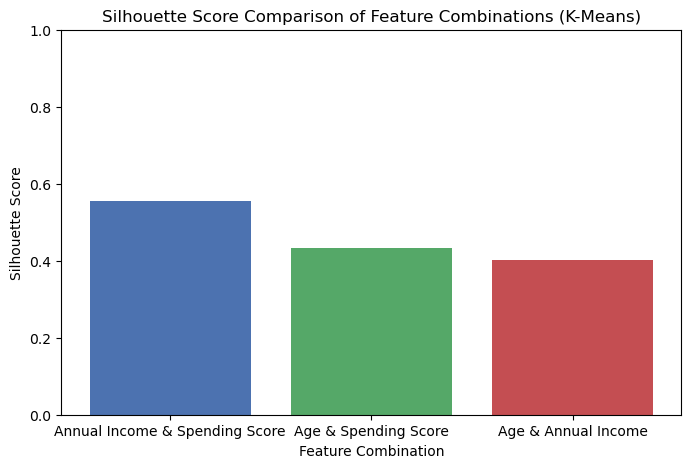

In [52]:
#Compares and visualizes silhouette scores for different feature combinations in K-Means clustering.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
dataset = pd.read_csv('Mall_Customers.csv')
feature_combinations = [
    (['Annual Income (k$)', 'Spending Score (1-100)'], 'Annual Income & Spending Score'),
    (['Age', 'Spending Score (1-100)'], 'Age & Spending Score'),
    (['Age', 'Annual Income (k$)'], 'Age & Annual Income')
]
# Dictionary to store silhouette scores for each feature combination
silhouette_scores = {}
# Calculate silhouette scores for each combination
for features, title in feature_combinations:
    X = dataset[features].values
    kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_kmeans)
    silhouette_scores[title] = silhouette_avg
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color=['#4c72b0', '#55a868', '#c44e52'])
plt.title('Silhouette Score Comparison of Feature Combinations (K-Means)')
plt.xlabel('Feature Combination')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)
plt.xticks(rotation=0, ha="center")  
plt.show()


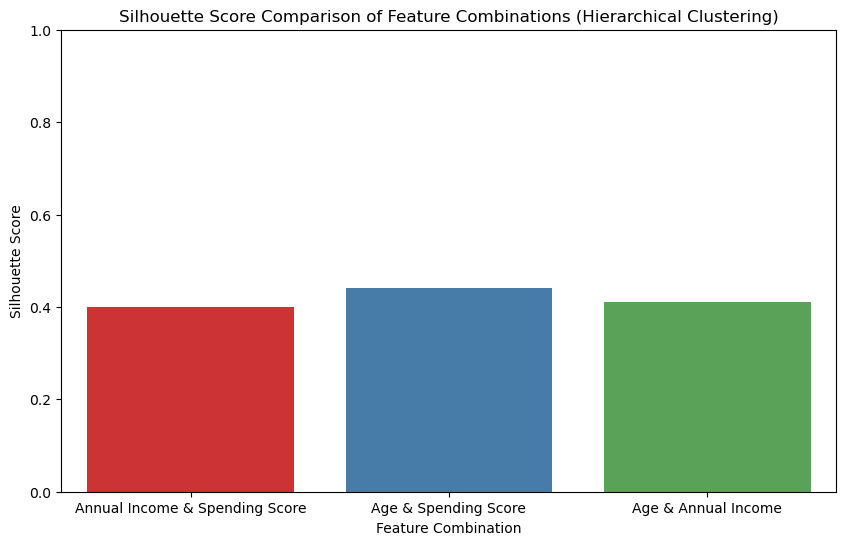

In [43]:
#Compares and visualizes silhouette scores for different feature combinations in Hierarchical clustering.
import matplotlib.pyplot as plt
import seaborn as sns
silhouette_scores_hc = {
    'Annual Income & Spending Score': 0.4, 
    'Age & Spending Score': 0.44,         
    'Age & Annual Income': 0.41             
}
#Silhouette scores for hierarchical clustering
plt.figure(figsize=(10, 6))
sns.barplot(x=list(silhouette_scores_hc.keys()), y=list(silhouette_scores_hc.values()), palette='Set1')
plt.ylim(0, 1)
plt.title('Silhouette Score Comparison of Feature Combinations (Hierarchical Clustering)')
plt.xlabel('Feature Combination')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=0, ha="center")
plt.show()


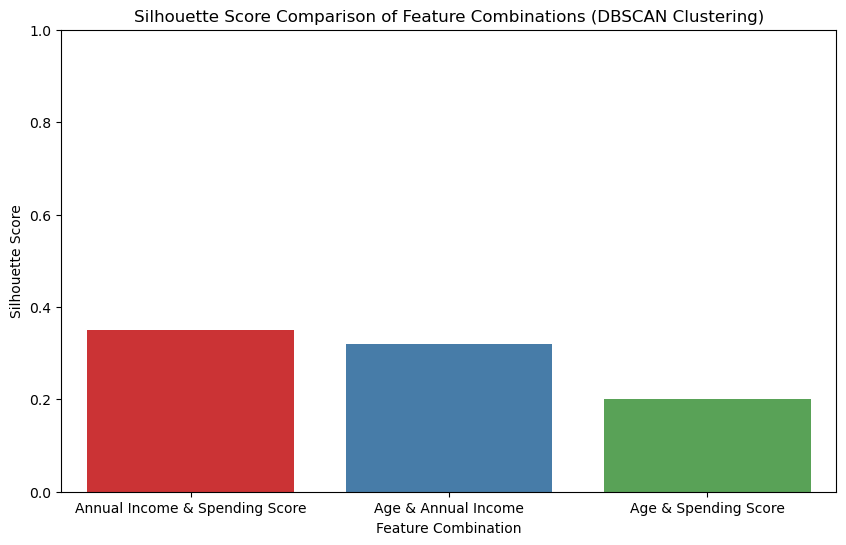

In [44]:
##Compares and visualizes silhouette scores for different feature combinations in DBSCAN clustering.
import matplotlib.pyplot as plt
import seaborn as sns
#Silhouette scores for DBSCAN clustering
silhouette_scores_hc = {
    'Annual Income & Spending Score': 0.35,  
            
    'Age & Annual Income': 0.32,
    'Age & Spending Score': 0.20,
}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(silhouette_scores_hc.keys()), y=list(silhouette_scores_hc.values()), palette='Set1')
plt.ylim(0, 1)
plt.title('Silhouette Score Comparison of Feature Combinations (DBSCAN Clustering)')
plt.xlabel('Feature Combination')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=0, ha="center")
plt.show()


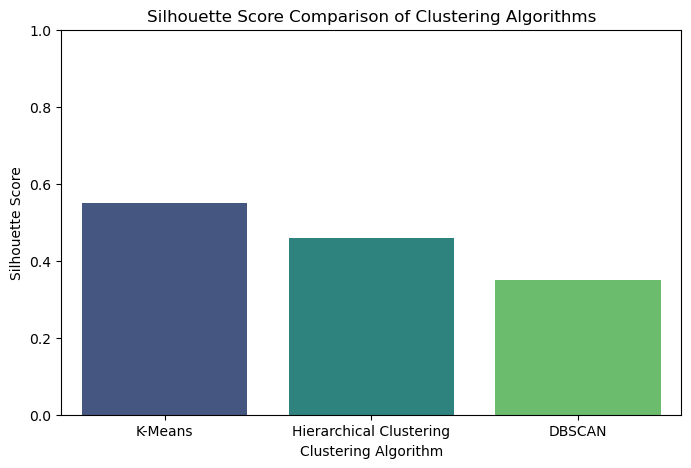

In [45]:
#Compares the silhouette scores of K-Means, Hierarchical Clustering, and DBSCAN, visualizing the results in a bar chart.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
# Load the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values
# K-Means clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
# DBSCAN clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data_scaled)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(pca_features)
dataset['DBSCAN_Cluster'] = dbscan.labels_
if len(set(dbscan.labels_)) > 1:
    dbscan_silhouette_score = silhouette_score(pca_features, dataset['DBSCAN_Cluster'])
else:
    dbscan_silhouette_score = None
scores = {
    'K-Means': silhouette_score_kmeans,
    'Hierarchical Clustering': silhouette_score_hc,
    'DBSCAN': dbscan_silhouette_score
}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette='viridis')
plt.title('Silhouette Score Comparison of Clustering Algorithms')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # Adjust y-axis limits
plt.show()
